In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('zillow_data.csv')

In [3]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
len(data['RegionName'].unique())

14723

# Step 2: Data Preprocessing

In [5]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [7]:
xx = get_datetimes(data)

In [8]:
xx

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

# Step 3: EDA and Visualization

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [9]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [10]:
list(data.columns[:7])

['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

In [11]:
def melt_data(df):
    melted = pd.melt(df, id_vars=list(data.columns[:7]), var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
df = melt_data(data)

In [13]:
df.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [15]:
inflation = pd.read_csv('CSUSHPINSA.csv')

In [16]:
inflation.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.754
1,1987-02-01,64.155
2,1987-03-01,64.490
3,1987-04-01,64.995
4,1987-05-01,65.569


In [17]:
inflation.describe()

,CSUSHPINSA
count,398.000000
mean,127.945568
std,45.037013
min,63.754000
25%,80.465250
50%,134.081500
75%,167.021250
max,213.159000


In [18]:
inflation['DATE'] = pd.to_datetime(inflation['DATE'])

In [19]:
inflation.set_index('DATE', inplace=True)

In [20]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 398 entries, 1987-01-01 to 2020-02-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CSUSHPINSA  398 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


Filtering the dataframe down to the dates we need

In [21]:
inflation = inflation['1996-04' : '2018-04']

In [22]:
inflation.head()

,CSUSHPINSA
DATE,
1996-04-01,82.144
1996-05-01,82.622
1996-06-01,83.070
1996-07-01,83.443
1996-08-01,83.671


In [23]:
inflation.tail()

,CSUSHPINSA
DATE,
2017-12-01,195.970
2018-01-01,196.241
2018-02-01,197.032
2018-03-01,198.696
2018-04-01,200.729


We will need to calculate the real prices, adjusted for inflation. We take the latest date (2018-04-01) of 200.729 and use this to work out the historical prices in real terms.

In [24]:
inflation['pct_change'] = inflation['CSUSHPINSA'] / 200.729

In [25]:
inflation_merged = pd.concat([inflation,df], axis=1)

In [26]:
inflation_merged.head()

,CSUSHPINSA,pct_change,value
1996-04-01,82.144,0.409228,118299.123063
1996-05-01,82.622,0.411610,118419.044139
1996-06-01,83.070,0.413842,118537.423268
1996-07-01,83.443,0.415700,118653.069278
1996-08-01,83.671,0.416836,118780.254312


In [44]:
inflation_merged['infl_adj_value3'] = inflation_merged['value'] * (1 - inflation_merged['pct_change2'])

We will now calculate the inflation adjusted prices

In [28]:
inflation_merged['infl_adj_value'] = inflation_merged['value'] / inflation_merged['pct_change']

In [29]:
inflation_merged.head()

,CSUSHPINSA,pct_change,value,infl_adj_value
1996-04-01,82.144,0.409228,118299.123063,289078.504497
1996-05-01,82.622,0.411610,118419.044139,287697.420917
1996-06-01,83.070,0.413842,118537.423268,286431.906045
1996-07-01,83.443,0.415700,118653.069278,285429.717809
1996-08-01,83.671,0.416836,118780.254312,284957.054030


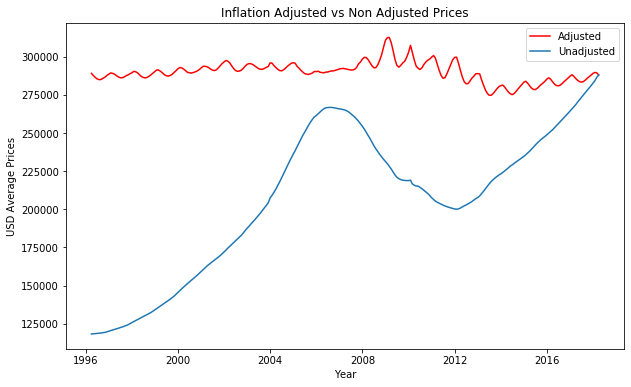

In [40]:
plt.figure(figsize=(10,6))
plt.plot(inflation_merged['infl_adj_value'], color='red', label='Adjusted')
plt.plot(df, label='Unadjusted')
plt.xlabel('Year')
plt.ylabel('USD Average Prices')
plt.legend()
plt.title('Inflation Adjusted vs Non Adjusted Prices')
plt.show()

In [41]:
df.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [42]:
to_drop= list(data.columns[7:])

In [43]:
data.drop(columns=to_drop, axis=1, inplace=True)

In [44]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank'],
      dtype='object')

# Checking for Stationarity

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


### Unadjusted Data

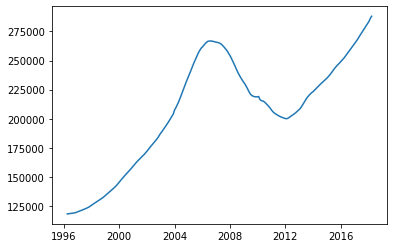

In [46]:
plt.plot(df)

In [47]:
df_roll_mean = df.rolling(window=12).mean()
df_roll_std = df.rolling(window=12).std()

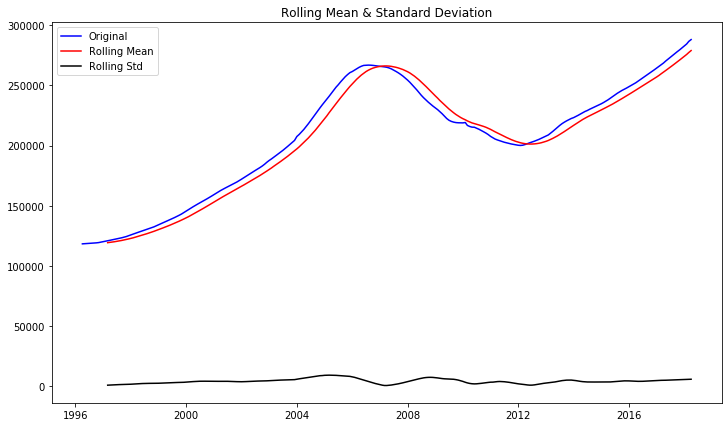

In [48]:
fig = plt.figure(figsize=(12,7))
plt.plot(df, color='blue', label='Original')
plt.plot(df_roll_mean, color='red', label='Rolling Mean')
plt.plot(df_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [49]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['value'])

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [50]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)



print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(-1.885144518377796, 0.33908154394125245, 2, 262, {'1%': -3.455558114028747, '5%': -2.872635586277424, '10%': -2.572682677000175}, 3505.613476823798)
Results of Dickey-Fuller test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


HO : Non Stationary
Ha : Stationary

Test Statistic is higher than critical value at all confidence levels. We fail to reject the null hypothesis. THe time series is non stationary

Data will need to be converted to stationary.

### Adjusted Data

In [51]:
infladj_roll_mean = inflation_merged['infl_adj_value'].rolling(window=12).mean()
infladj_roll_std = inflation_merged['infl_adj_value'].rolling(window=12).std()

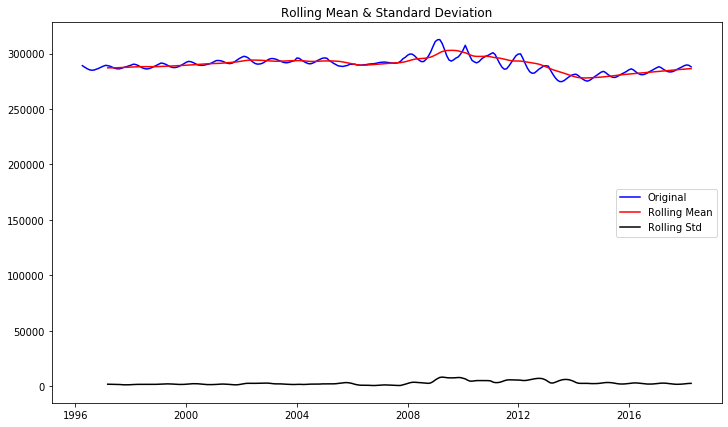

In [52]:
fig = plt.figure(figsize=(12,7))
plt.plot(inflation_merged['infl_adj_value'], color='blue', label='Original')
plt.plot(infladj_roll_mean, color='red', label='Rolling Mean')
plt.plot(infladj_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
dftest2 = adfuller(inflation_merged['infl_adj_value'])

In [55]:
dfoutput2 = pd.Series(dftest2[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest2[4].items():
    dfoutput2['Critical Value (%s)'%key] = value
print(dftest2)



print ('Results of Dickey-Fuller test: \n')

print(dfoutput2)

(-1.7046829076061114, 0.42870133150365436, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 3981.432510146131)
Results of Dickey-Fuller test: 

Test Statistic                  -1.704683
p-value                          0.428701
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


Still not stationary, will need to decompose the data

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results